In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
#%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/raw_data.csv", sep=",")

df_new = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/new_raw_data.csv", sep=",")

Raw_data_df = pd.concat([df,df_new])

In [3]:
# Clean Other columns
Raw_data_df["mood"] = [1 if i >= 0.5 else 0 for i in Raw_data_df.valence]
Raw_data_df["liveness"] = [1 if i >= 0.8 else 0 for i in Raw_data_df.liveness]
Raw_data_df["explicit"] = [1 if i == True else 0 for i in Raw_data_df.explicit]
Raw_data_df["speechiness"] = [1 if i > 0.66 else 0 for i in Raw_data_df.speechiness]
Raw_data_df["instrumentalness"] = [1 if i > 0.5 else 0 for i in Raw_data_df.instrumentalness]

## Dataset Description

In [4]:
Raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 99
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1900 non-null   object 
 1   album             1900 non-null   object 
 2   track_name        1900 non-null   object 
 3   release_date      1900 non-null   object 
 4   popularity        1900 non-null   int64  
 5   genres            1887 non-null   object 
 6   explicit          1900 non-null   int64  
 7   followers         1900 non-null   int64  
 8   track_id          1900 non-null   object 
 9   danceability      1900 non-null   float64
 10  energy            1900 non-null   float64
 11  key               1900 non-null   int64  
 12  loudness          1900 non-null   float64
 13  mode              1900 non-null   int64  
 14  speechiness       1900 non-null   int64  
 15  instrumentalness  1900 non-null   int64  
 16  liveness          1900 non-null   int64  
 1

In [10]:
(Raw_data_df.isnull().sum()/len(Raw_data_df)*100).apply('{:,.2f}%'.format)

artist               0.00%
album                0.00%
track_name           0.00%
release_date         0.00%
popularity           0.00%
genres               0.68%
explicit             0.00%
followers            0.00%
track_id             0.00%
danceability         0.00%
energy               0.00%
key                  0.00%
loudness             0.00%
mode                 0.00%
speechiness          0.00%
instrumentalness     0.00%
liveness             0.00%
valence              0.00%
tempo                0.00%
duration_ms          0.00%
time_signature       0.00%
sub-genres          16.21%
mood                 0.00%
dtype: object

In [12]:
numerical_features = ['popularity', 'followers', 'danceability', 'energy', 'loudness', 'tempo','duration_ms']
categorical_features = ['genres', 'sub-genres', 'explicit','liveness','instrumentalness','mode','time_signature','key','speechiness']

In [13]:
Raw_data_df[numerical_features].describe().applymap('{:,.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
popularity,"1,900.00",73.57,12.26,0.00,69.00,75.00,81.00,100.00
followers,"1,900.00","19,875,952.10","24,681,623.90",183.00,"2,914,238.00","9,016,130.00","26,052,197.00","112,305,182.00"
danceability,"1,900.00",0.66,0.14,0.16,0.58,0.67,0.76,0.97
energy,"1,900.00",0.68,0.16,0.06,0.58,0.70,0.81,0.99
loudness,"1,900.00",-5.79,2.06,-15.64,-6.83,-5.50,-4.36,-0.28
tempo,"1,900.00",121.32,27.25,60.02,99.99,121.00,138.03,210.86
duration_ms,"1,900.00","220,163.85","40,647.23","97,393.00","194,729.00","216,020.00","240,042.75","613,027.00"


## Outlier Detection

In [56]:
continuous = Raw_data_df[numerical_features]

Q1 = continuous.quantile(0.25)
Q3 = continuous.quantile(0.75)
IQR = Q3 - Q1

superior = (continuous > (Q3 + 1.5 * IQR)).sum()
inferior = (continuous < (Q1 - 1.5 * IQR)).sum()  

In [57]:
print("Superior Outliers")
print((superior/len(Raw_data_df)*100).apply("{0:.2f}%".format))

Superior Outliers
popularity       0.05%
followers       10.68%
danceability     0.00%
energy           0.00%
loudness         0.05%
tempo            0.68%
duration_ms      2.63%
dtype: object


In [58]:
print("Inferior Outliers")
print((inferior/len(Raw_data_df)*100).apply("{0:.2f}%".format))

Inferior Outliers
popularity      2.32%
followers       0.00%
danceability    0.95%
energy          1.05%
loudness        2.74%
tempo           0.00%
duration_ms     0.58%
dtype: object


## Correlation Matrix

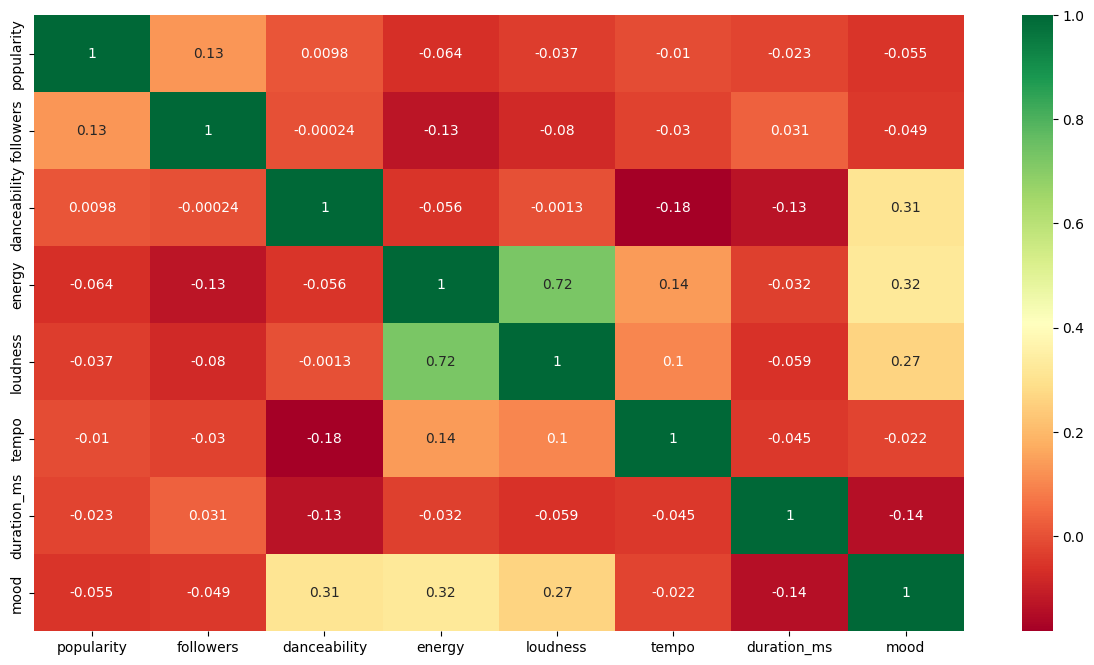

In [90]:
Raw_data_df_corr = Raw_data_df[['popularity', 'followers', 'danceability', 'energy', 'loudness', 'tempo','duration_ms','mood']]
corr_mat = Raw_data_df_corr.corr()
plt.figure(figsize=(15,8))
#plot heat map
g=sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")

# EDA

In [42]:
(Raw_data_df['mood'].value_counts()/len(Raw_data_df)*100).apply("{0:.2f}%".format)

1    51.74%
0    48.26%
Name: mood, dtype: object

<Figure size 1500x800 with 0 Axes>

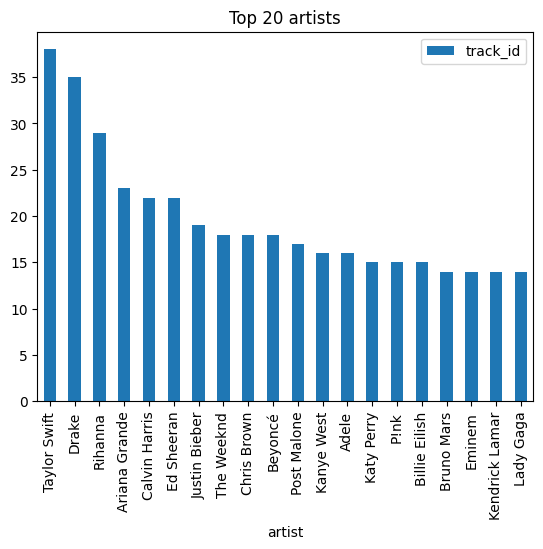

In [70]:
plt.figure(figsize=(15,8))
top_artists = Raw_data_df.pivot_table(values = "track_id",index = "artist",aggfunc = 'count').sort_values(ascending=False,by="track_id")
top_artists.head(20).plot(kind="bar")
plt.title("Top 20 artists")
plt.show();

<Figure size 2000x500 with 0 Axes>

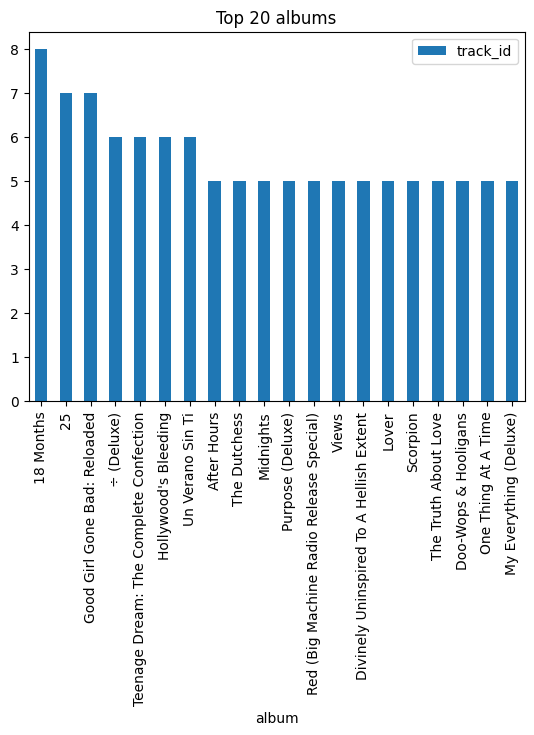

In [29]:
top_albums = Raw_data_df.pivot_table(values = "track_id",index = "album",aggfunc = 'count').sort_values(ascending=False,by="track_id")

top_albums.head(20).plot(kind="bar")
plt.title("Top 20 albums")
plt.show()

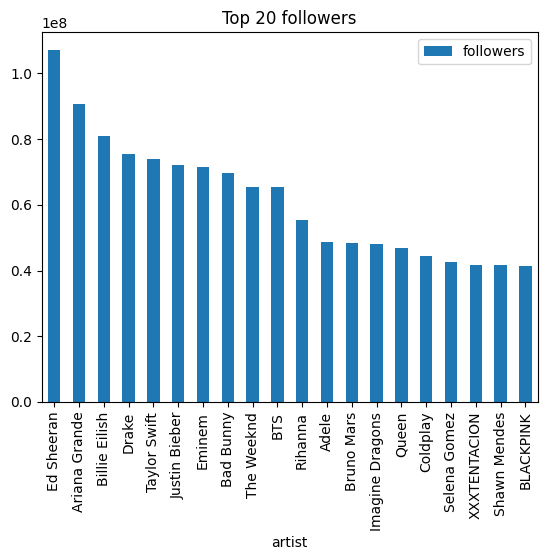

In [5]:
top_followers = Raw_data_df.pivot_table(values = "followers",index = "artist",aggfunc = 'mean').sort_values(ascending=False,by="followers")

top_followers.head(20).plot(kind="bar")
plt.title("Top 20 followers")
plt.show();

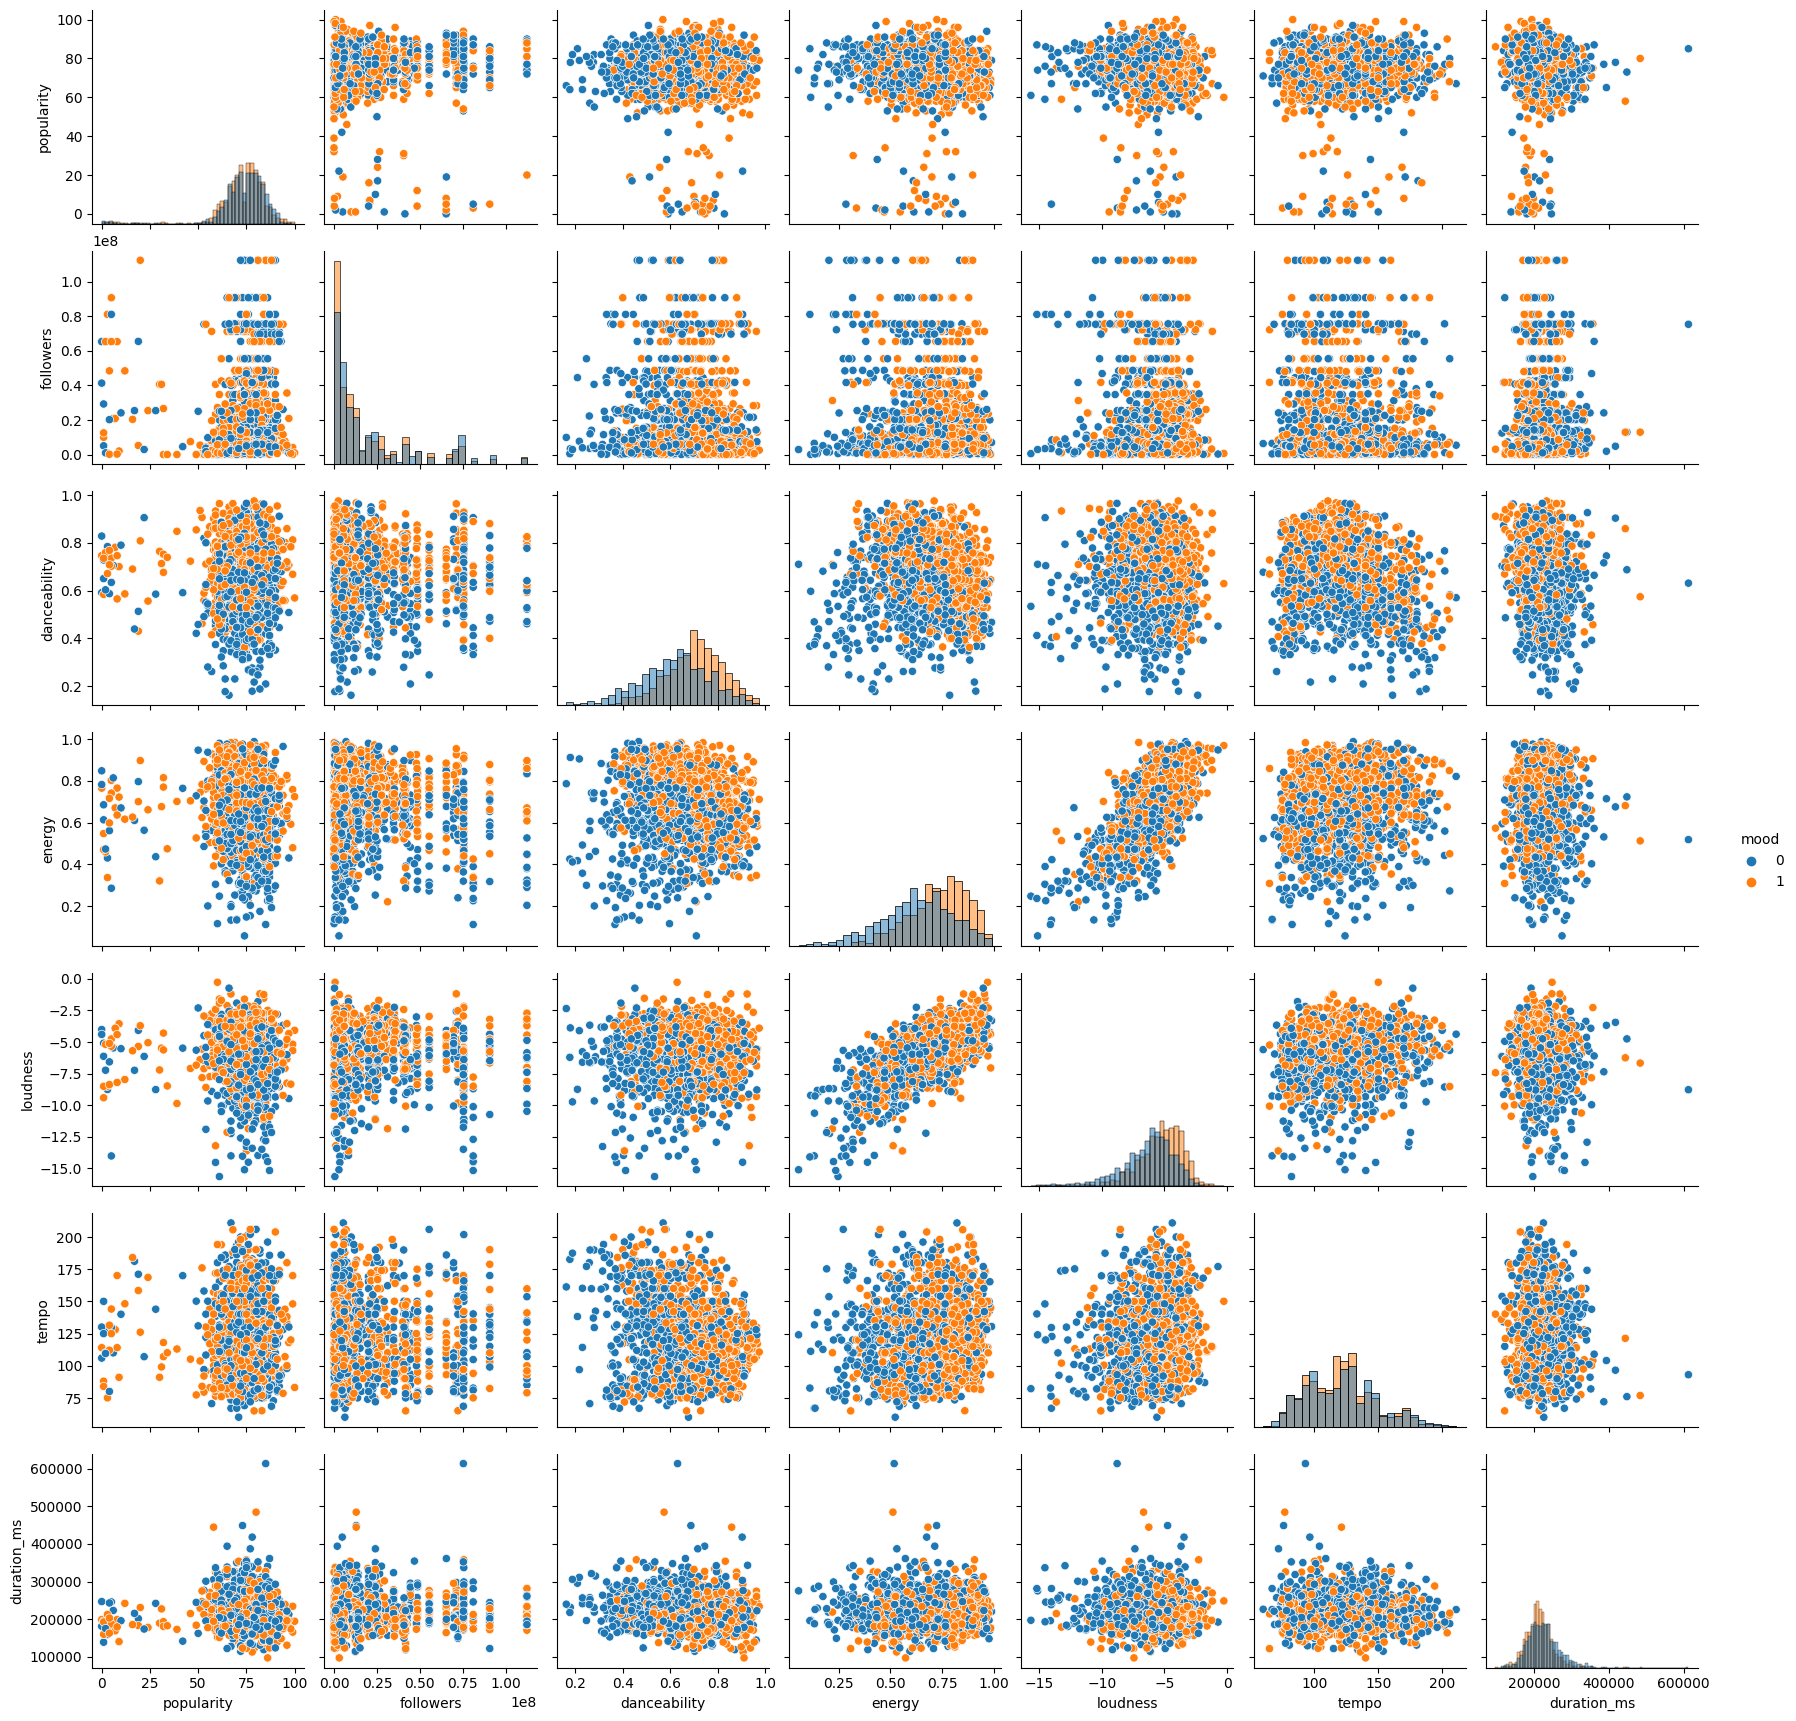

In [16]:
sns.pairplot(Raw_data_df[['popularity', 'followers', 'danceability', 'energy', 'loudness', 'tempo','duration_ms','mood']], hue="mood",diag_kind="hist")

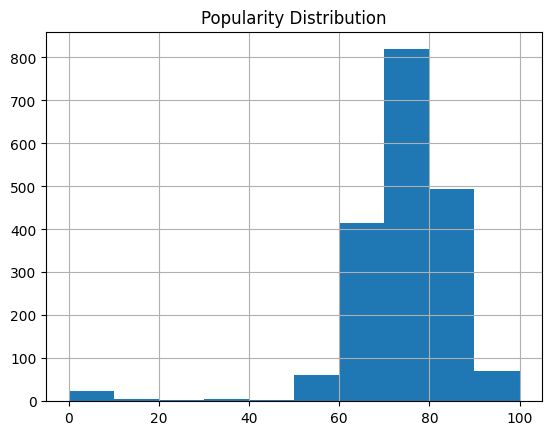

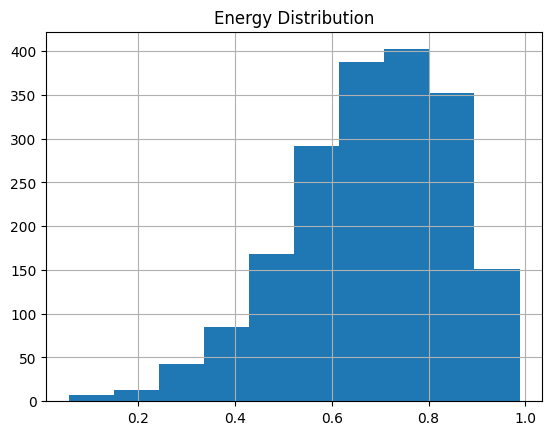

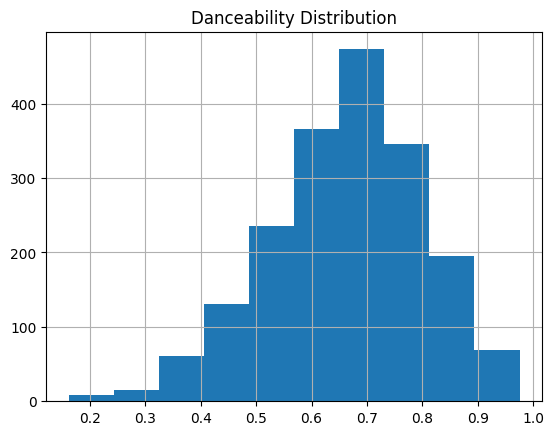

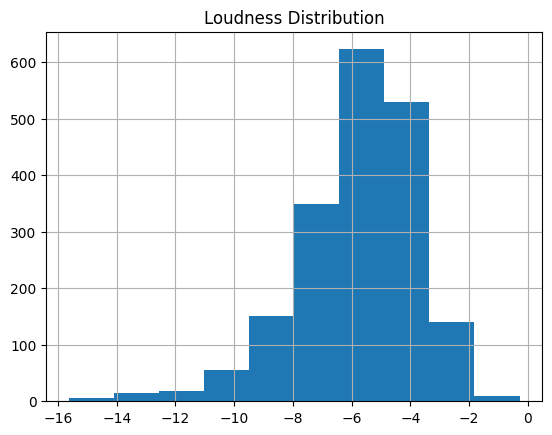

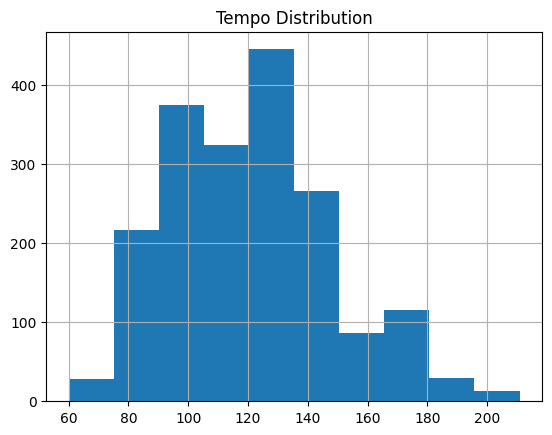

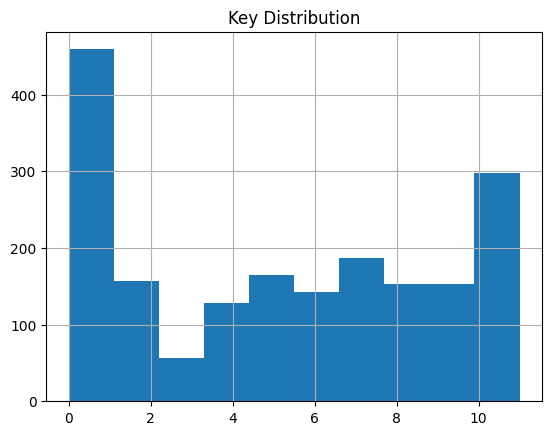

In [12]:
Raw_data_df["popularity"].hist(bins=10)
plt.title("Popularity Distribution")
plt.show();

Raw_data_df["energy"].hist(bins=10)
plt.title("Energy Distribution")
plt.show();

Raw_data_df["danceability"].hist(bins=10)
plt.title("Danceability Distribution")
plt.show();

Raw_data_df["loudness"].hist(bins=10)
plt.title("Loudness Distribution")
plt.show();

Raw_data_df["tempo"].hist(bins=10)
plt.title("Tempo Distribution")
plt.show();

Raw_data_df["key"].hist(bins=10)
plt.title("Key Distribution")
plt.show();

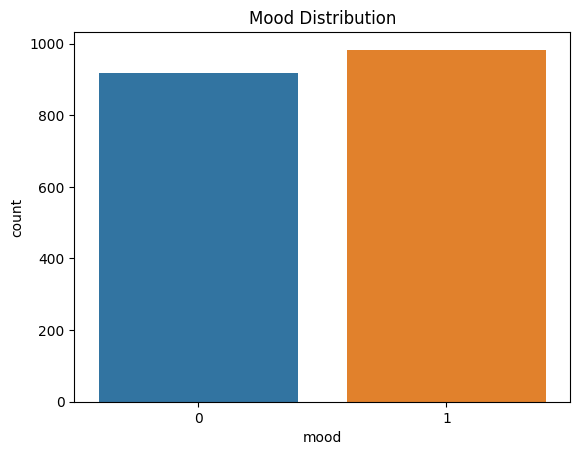

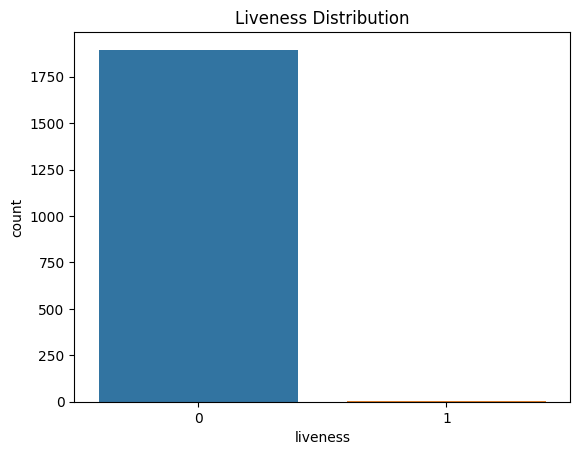

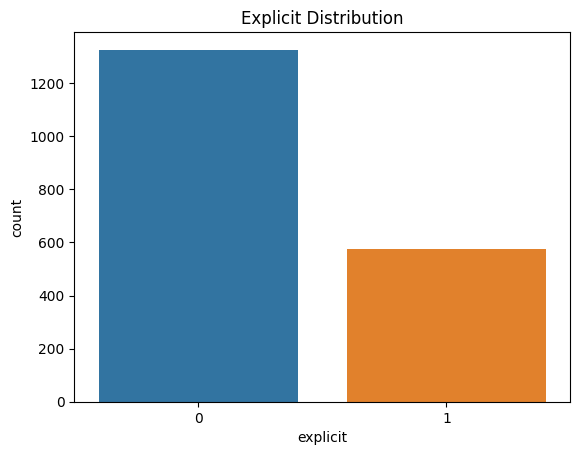

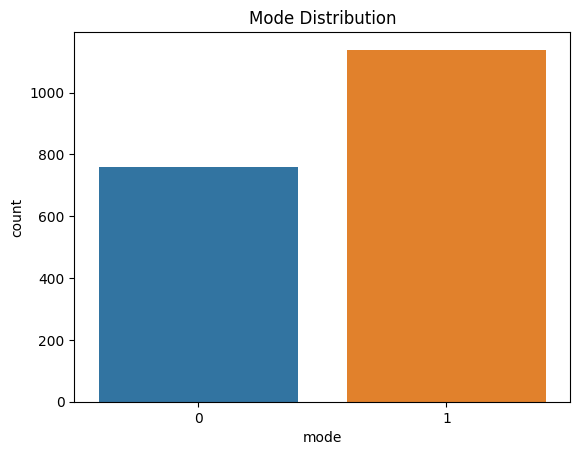

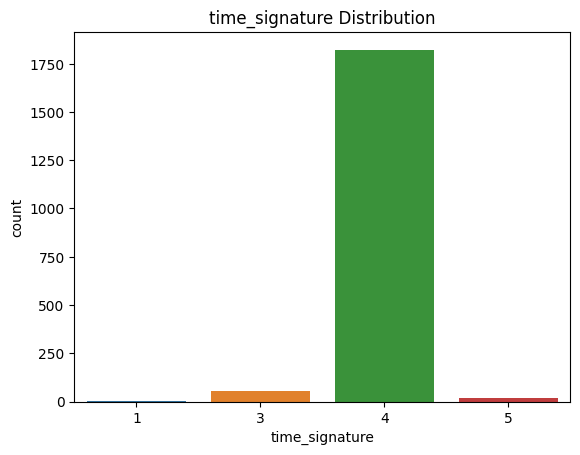

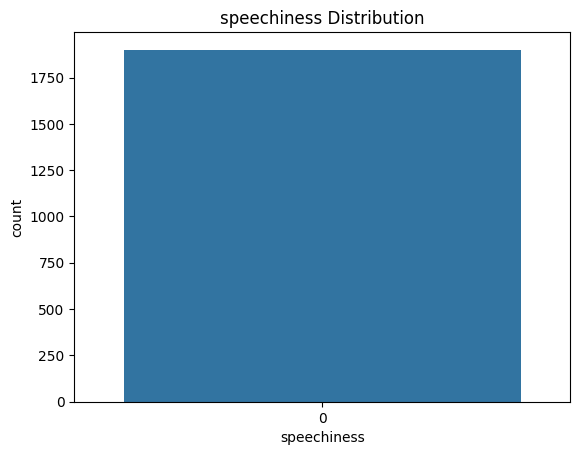

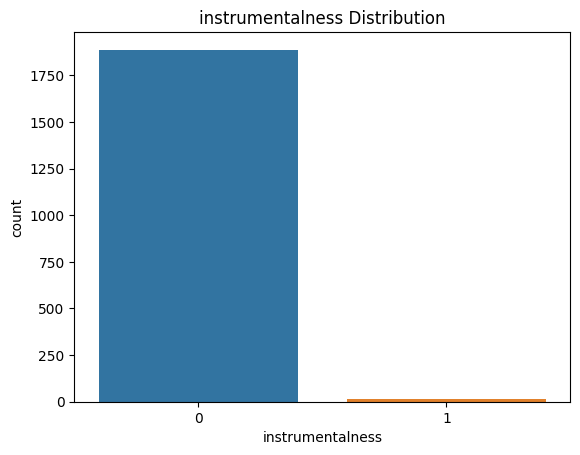

In [13]:
sns.countplot(data=Raw_data_df, x ="mood")
plt.title("Mood Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="liveness")
plt.title("Liveness Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="explicit")
plt.title("Explicit Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="mode")
plt.title("Mode Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="time_signature")
plt.title("time_signature Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="speechiness")
plt.title("speechiness Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="instrumentalness")
plt.title("instrumentalness Distribution")
plt.show();

In [18]:
Raw_data_df['speechiness'].unique()

array([0], dtype=int64)

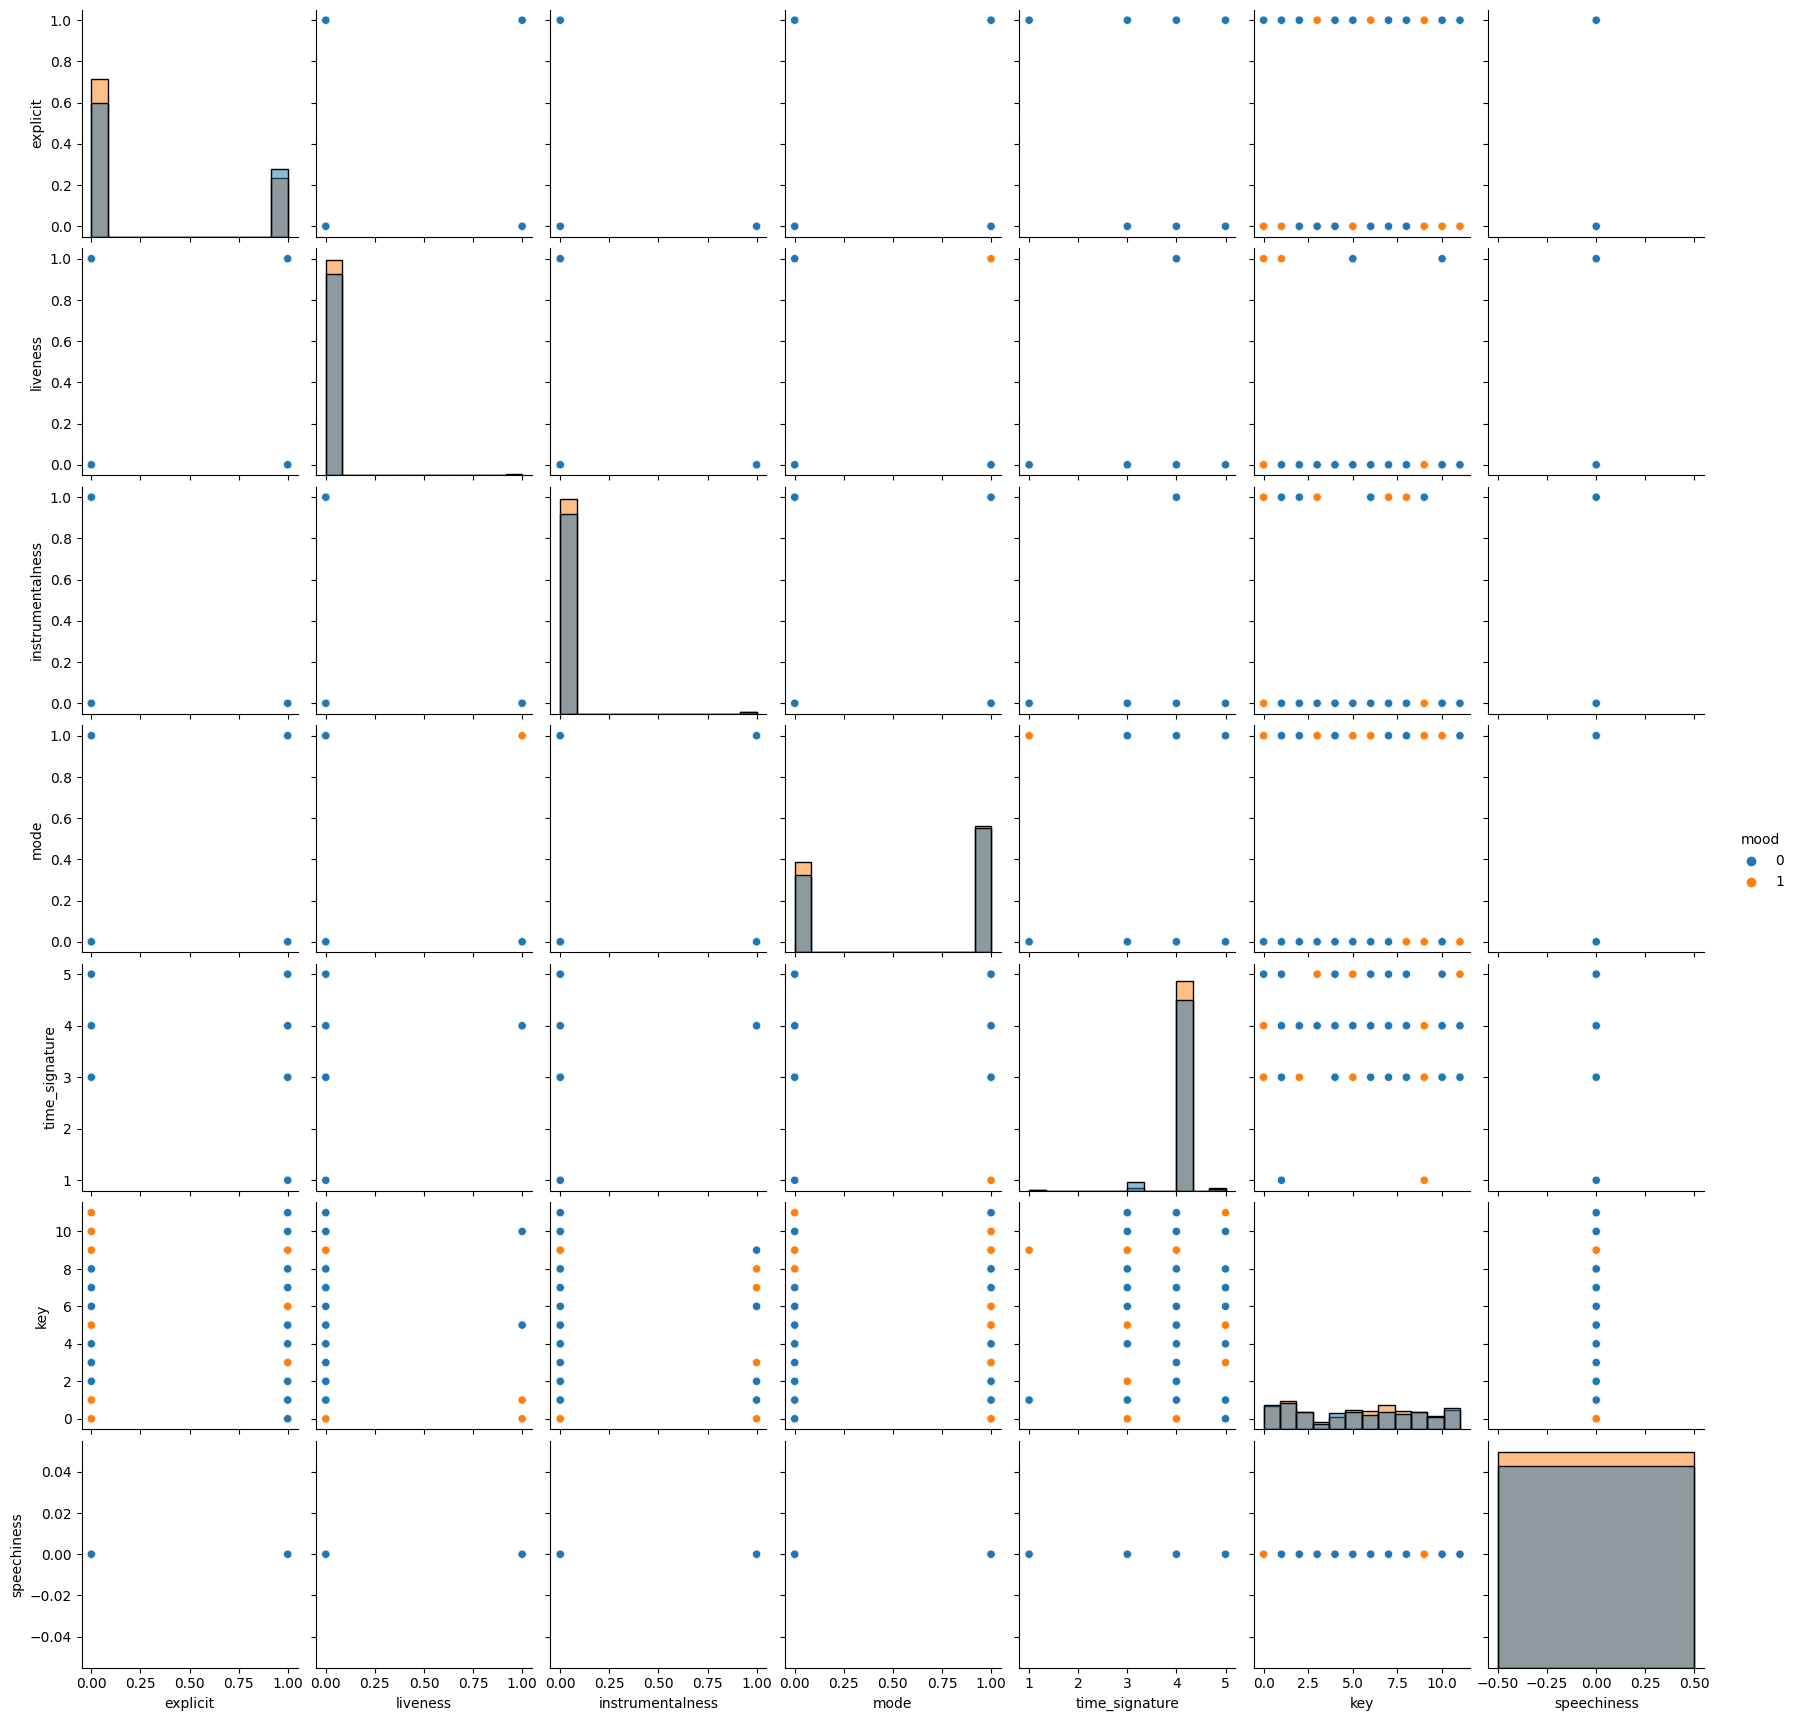

In [17]:
sns.pairplot(Raw_data_df[[ 'explicit','liveness','instrumentalness','mode','time_signature','key','speechiness','mood']], hue="mood",diag_kind="hist")

In [30]:
print("crosstab mode")
mode_ct = pd.crosstab(Raw_data_df['mood'],Raw_data_df['mode'])
mode_ct

crosstab mode


mode,0,1
mood,,
0,353,564
1,408,575


In [32]:
print("crosstab explicit")
explicit_ct = pd.crosstab(Raw_data_df['mood'],Raw_data_df['explicit'])
explicit_ct

crosstab explicit


explicit,0,1
mood,,
0,609,308
1,717,266


In [38]:
Raw_data_df[Raw_data_df['time_signature']!= 1]

,artist,album,track_name,release_date,popularity,genres,explicit,followers,track_id,danceability,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sub-genres,mood
0,Mariah Carey,The Emancipation of Mimi,We Belong Together,2005-04-12,73,dance pop,0,9012980,3LmvfNUQtglbTrydsdIqFU,0.837,...,1,0,0,0,0.762,139.986,201400,4,pop,1
1,Mario,Let Me Love You,Let Me Love You,2004-09-21,76,dance pop,0,3152834,3ibKnFDaa3GhpPGlOUj7ff,0.656,...,0,0,0,0,0.556,94.514,256733,4,r&b,1
2,Kanye West,Late Registration,Gold Digger,2005-08-30,81,chicago rap,1,20164612,1PS1QMdUqOal0ai3Gt7sDQ,0.629,...,0,0,0,0,0.623,93.034,207627,4,hip hop,1
3,Rihanna,Music Of The Sun,Pon de Replay,2005-08-29,81,barbadian pop,0,55382107,4TsmezEQVSZNNPv5RJ65Ov,0.779,...,1,0,0,0,0.498,99.019,246960,4,pop,0
4,50 Cent,The Massacre,Candy Shop,2005-03-03,82,east coast hip hop,1,11245845,5D2mYZuzcgjpchVY1pmTPh,0.614,...,1,0,0,0,0.755,125.173,209107,5,gangster rap,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SZA,SOS,Nobody Gets Me,2022-12-09,86,pop,1,12722022,5Y35SjAfXjjG0sFQ3KOxmm,0.358,...,1,0,0,0,0.276,99.796,180853,3,r&b,0
96,Morgan Wallen,One Thing At A Time,’98 Braves,2023-03-03,80,contemporary country,0,5973780,3oZ6dlSfCE9gZ55MGPJctc,0.488,...,1,0,0,0,0.484,142.139,178704,4,NaN,0
97,NewJeans,NewJeans 'OMG',Ditto,2023-01-02,71,k-pop,0,3450150,5702raF31K9rvD6KZ6sCTo,0.814,...,0,0,0,0,0.183,133.854,185507,4,k-pop girl group,0
98,SZA,Good Days,Good Days,2020-12-25,81,pop,1,12722022,3YJJjQPAbDT7mGpX3WtQ9A,0.436,...,0,0,0,0,0.412,121.002,279204,4,r&b,0


In [39]:
print("crosstab time_signature")

Imp_time = Raw_data_df[Raw_data_df['time_signature']!= 1]
time_signature_ct = pd.crosstab(Imp_time['mood'],Imp_time['time_signature'])
time_signature_ct

crosstab time_signature


time_signature,3,4,5
mood,,,
0,40,867,9
1,14,956,12


In [34]:
explicit_ct_Results=stats.chi2_contingency(explicit_ct)
print(f'chi-square statistic: {explicit_ct_Results[0]}')
print(f'p-value: {explicit_ct_Results[1]}')
print(f'degree of freedom: {explicit_ct_Results[2]}')
print('expected contingency table') 
print(explicit_ct_Results[3])

chi-square statistic: 9.281377517803184
p-value: 0.0023149527202858096
degree of freedom: 1
expected contingency table
[[639.96947368 277.03052632]
 [686.03052632 296.96947368]]


In [36]:
mode_ct_Results=stats.chi2_contingency(mode_ct)
print(f'chi-square statistic: {mode_ct_Results[0]}')
print(f'p-value: {mode_ct_Results[1]}')
print(f'degree of freedom: {mode_ct_Results[2]}')
print('expected contingency table') 
print(mode_ct_Results[3])

chi-square statistic: 1.6676075896391613
p-value: 0.1965792847438288
degree of freedom: 1
expected contingency table
[[367.28263158 549.71736842]
 [393.71736842 589.28263158]]


In [43]:
time_signature_ct_Results=stats.chi2_contingency(time_signature_ct)
print(f'chi-square statistic: {time_signature_ct_Results[0]}')
print(f'p-value: {time_signature_ct_Results[1]}')
print(f'degree of freedom: {time_signature_ct_Results[2]}')
print('expected contingency table') 
print(time_signature_ct_Results[3])

chi-square statistic: 15.015234493625126
p-value: 0.0005488873949833053
degree of freedom: 2
expected contingency table
[[ 26.06111697 879.80400421  10.13487882]
 [ 27.93888303 943.19599579  10.86512118]]
